In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
pip install --user -U nltk

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
import nltk; nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\saheediyanda\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\saheediyanda\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\saheediyanda\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\saheediyanda\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\saheediyanda\AppData\Roaming\nltk_data..
[nltk_

True

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saheediyanda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
sid = SentimentIntensityAnalyzer()

In [ ]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = ds_tweets['text'].apply(sid.polarity_scores)

In [ ]:
# Print out the text of a positive tweet
print(ds_tweets[sentiment > 0.6]['text'].values[0])

# Print out the text of a negative tweet
print(ds_tweets[sentiment < -0.6]['text'].values[0])

# Generate average sentiment scores for #python
sentiment_py = sentiment[ check_word_in_tweet('#python', ds_tweets) ].resample('1 d').mean()

# Generate average sentiment scores for #rstats
sentiment_r = sentiment[ check_word_in_tweet('#rstats', ds_tweets) ].resample('1 d').mean()

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot average #python sentiment per day
plt.plot(sentiment_py.index.day, sentiment_py, color = 'green')

# Plot average #rstats sentiment per day
plt.plot(sentiment_r.index.day, sentiment_r, color = 'blue')

plt.xlabel('Day')
plt.ylabel('Sentiment')
plt.title('Sentiment of data science languages')
plt.legend(('#python', '#rstats'))
plt.show()

In [7]:
import networkx as nc

In [ ]:
# Import networkx
import networkx as nx

# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    sotu_retweets,
    source = 'user-screen_name',
    target = 'retweeted_status-user-screen_name',
    create_using = nx.DiGraph())
 
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

# Import networkx
import networkx as nx

# Create reply network from edgelist
G_reply = nx.from_pandas_edgelist(
    sotu_replies,
    source = 'user-screen_name',
    target = 'in_reply_to_screen_name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in reply network:', len(G_reply.nodes()))

# Print the number of edges
print('Edges in reply network:', len(G_reply.edges()))

In [ ]:
# Create random layout positions
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

In [ ]:
# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rt)

# Generate in-degree centrality for replies 
reply_centrality = nx.in_degree_centrality(G_reply)

# Store centralities in DataFrame
rt = pd.DataFrame(list(rt_centrality.items()), columns = ['screen_name', 'degree_centrality'])
reply = pd.DataFrame(list(reply_centrality.items()), columns = ['screen_name', 'degree_centrality'])

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

In [ ]:
# Betweenness centrality
# Betweenness centrality for retweet and reply networks signals users who bridge between different Twitter communities. 
# These communities may be tied together by topic or ideology.

# networkx has been imported as nx. 
# The networks G_rt and G_reply, and column_names = ['screen_name', 'betweenness_centrality'] have been loaded for you.
# Generate betweenness centrality for retweets 

rt_centrality = nx.betweenness_centrality(G_rt)

# Generate betweenness centrality for replies 
reply_centrality = nx.betweenness_centrality(G_reply)

# Store centralities in data frames
rt = pd.DataFrame(list(rt_centrality.items()), columns = ['screen_name', 'betweenness_centrality'])
reply = pd.DataFrame(list(reply_centrality.items()), columns =['screen_name', 'betweenness_centrality'])

# Print first five results in descending order of centrality
print(rt.sort_values('betweenness_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('betweenness_centrality', ascending = False).head())

In [ ]:
# Ratios
# While not strictly a measure of importance to a network,
# the idea of being "ratio'd" is a network measure which is particular to Twitter and is typically used to judge the unpopularity of a tweet.
# "The Ratio," as it is called, is calculated by taking the number of replies and dividing it by the number of retweets. For our purposes, 
# it makes conceptual sense to take only the in-degrees of both the retweet and reply networks.

# The networks G_rt and G_reply, and column_names = ['screen_name', 'degree'] have been loaded for you.

# Calculate in-degrees and store in DataFrame
degree_rt = pd.DataFrame(list(G_rt.in_degree()), columns = ['screen_name', 'degree'])
degree_reply = pd.DataFrame(list(G_reply.in_degree()), columns = ['screen_name', 'degree'])

# Merge the two DataFrames on screen name
ratio = degree_rt.merge(degree_reply, on = 'screen_name', suffixes = ('_rt', '_reply'))

# Calculate the ratio
ratio['ratio'] = ratio['degree_reply'] /ratio['degree_rt']

# Exclude any tweets with less than 5 retweets
ratio = ratio[ratio['degree_rt'] >= 5]

# Print out first five with highest ratio
print(ratio.sort_values('ratio', ascending = False).head())

In [ ]:
Accessing user-defined location
In the slides, we saw that we could obtain user location via user-generated text, including the tweet itself and the location field in the user's description. These are the two most imprecise methods of obtaining user location, but also possibly more readily available.

In this exercise, you're going extract the user-defined location from a single example tweet as well as a large set of tweets. 
We've added another line to our flatten_tweets() function which will allow you to access user-defined location within the data frame.

tweet_obj['user-location'] = tweet_obj['user']['location']
In addition, the single tweet in JSON format tweet_json and the State of the Union tweets in JSON format tweets_sotu_json have been loaded for you.

# Print out the location of a single tweet
print(tweet_json['user']['location'])

# Flatten and load the SOTU tweets into a dataframe
tweets_sotu = pd.DataFrame(flatten_tweets(tweets_sotu_json))

# Print out top five user-defined locations
print(tweets_sotu['user-location'].value_counts().head())

In [ ]:
Accessing bounding box
Most tweets which have coordinate-level geographical information attached to them typically come in the form of a bounding box. 
Bounding boxes are a set of four longitudinal/latitudinal coordinates which denote a particular area in which the user can be located.
The bounding box is located in the place value of the Twitter JSON.

The dataset has been loaded for you as a DataFrame in tweets_sotu.


def getBoundingBox(place):
    """ Returns the bounding box coordinates."""
    return place['bounding_box']['coordinates']

# Apply the function which gets bounding box coordinates
bounding_boxes = tweets_sotu['place'].apply(getBoundingBox)

# Print out the first bounding box coordinates
print(bounding_boxes.values[0])

# Calculating the centroid
The bounding box can range from a city block to a whole state or even country. 
For simplicity's sake, one way we can deal with handling these data is by translating the bounding box into what's called a centroid, or the center of the bounding box. 
The calculation of the centroid is straight forward -- we calculate the midpoints of the lines created by the latitude and longitudes.

numpy has been imported as np.




In [ ]:
def calculateCentroid(place):
    """ Calculates the centroid from a bounding box."""
    # Obtain the coordinates from the bounding box.
    coordinates = place['bounding_box']['coordinates'][0]
        
    longs = np.unique( [x[0] for x in coordinates] )
    lats  = np.unique( [x[1] for x in coordinates] )

    if len(longs) == 1 and len(lats) == 1:
        # return a single coordinate
        return (longs[0], lats[0])
    elif len(longs) == 2 and len(lats) == 2:
        # If we have two longs and lats, we have a box.
        central_long = np.sum(longs) / 2
        central_lat  = np.sum(lats) /2
    else:
        raise ValueError("Non-rectangular polygon not supported: %s" % 
            ",".join(map(lambda x: str(x), coordinates)) )

    return (central_long, central_lat)
    
# Calculate the centroids of place     
centroids = tweets_sotu['place'].apply(calculateCentroid)

# Creating Basemap map
Basemap allows you to create maps in Python. 
The library builds projections for latitude and longitude coordinates and then passes the plotting work on to matplotlib. 
This means you can build extra features based on the power of matplotlib.

In this exercise, we're going to set up a map of the continental United States on a Mercator projection. 
The corner coordinates of this map are provided for you below.

In [5]:
!pip install basemap

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
# Import Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Set up the US bounding box
us_boundingbox = [-125, 22, -64, 50] 

# Set up the Basemap object
m = Basemap(llcrnrlon = us_boundingbox [0],
            llcrnrlat = us_boundingbox [1],
            urcrnrlon = us_boundingbox [2],
            urcrnrlat = us_boundingbox [3],
            projection='merc')

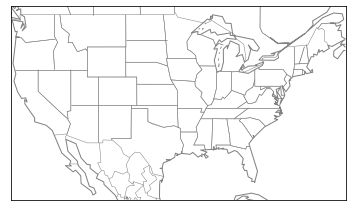

In [7]:
# Import Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Set up the US bounding box
us_boundingbox = [-125, 22, -64, 50] 

# Set up the Basemap object
m = Basemap(llcrnrlon = us_boundingbox[0],
            llcrnrlat = us_boundingbox[1],
            urcrnrlon = us_boundingbox[2],
            urcrnrlat = us_boundingbox[3],
            projection='merc')

# Draw continents in white,
# coastlines and countries in gray
m.fillcontinents(color='white')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Draw the states and show the plot
m.drawstates(color='gray')
plt.show()

# Plotting centroid coordinates
Because we can't plot whole bounding boxes, we summarize the bounding box location into a single point called a centroid. 
Plotting these on a Basemap map is straightforward. 
Once we calculate the centroids, we separate the longitudes and latitudes, then pass to the .scatter() method.

The Basemap object m has been created for you. The dataset tweets_sotu and function calculateCentroid() have also been loaded.

In [ ]:
# Calculate the centroids for the dataset
# and isolate longitudue and latitudes
centroids = tweets_sotu['place'].apply(calculateCentroid)
lon = [x[0] for x in centroids]
lat = [x[1] for x in centroids]

# Draw continents, coastlines, countries, and states
m.fillcontinents(color='white', zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Draw the points and show the plot
m.scatter(lon, lat, latlon = True, alpha = 0.7)
plt.show()

In [ ]:
# Generate sentiment scores
sentiment_scores = tweets_sotu['text'].apply(sid.polarity_scores)

# Isolate the compound element
sentiment_scores = [x['compound'] for x in sentiment_scores]

# Draw the points
m.scatter(lon, lat, latlon = True, 
           c = sentiment_scores,
           cmap = 'coolwarm', alpha = 0.7)

# Show the plot
plt.show()